In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

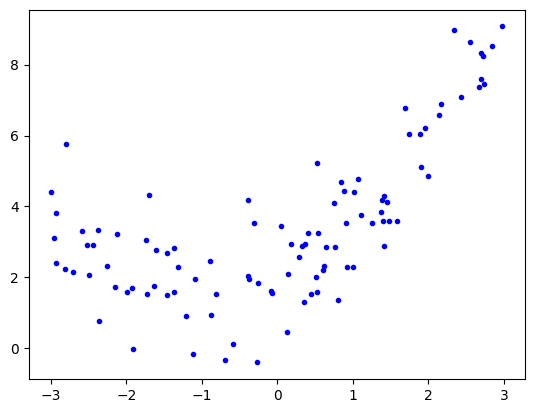

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')

# Ridge Regression
- add to cost ( MSE + l2 norm of $\theta$ )
- line regression model that try to fit train set with small weights as possible
- must `rescaling`
- add penalty to cost function during training
- need to fine-tunning regression hyperparameter $\alpha$
    - if too small -> will overfit
    - if too large -> will underfit

## Closed Form Implementation
$$
    \hat{\theta} =  (X^⊺X + \alpha A)^−1 X^⊺ y
$$

where $A$ is identity matrix of (n+1)x(n+1) with first row is zeros

using scikit-learn with a matrix factorization technique by André-Louis Cholesky

In [3]:
from sklearn.linear_model import Ridge

In [4]:
ridge_reg = Ridge(alpha=1, solver='cholesky').fit(X, y)

In [5]:
ridge_reg.predict([[1.5]])

array([[4.6654335]])

## Gradient Descent Implementation

In [6]:
from sklearn.linear_model import SGDRegressor

In [7]:
sgd_reg = SGDRegressor(penalty="l2") # penalty l2 norm
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [8]:
ridge_reg.predict([[1.5]])


array([[4.6654335]])

# Lasso Regression

- least absolute shrinkage and selection operator 
- add to cost function L1 norm
- tend to eliminate less important features (low weights)
    - output `sparse model` (few non-zero features)
    - act as featire selection
- use  `subgradients` instead of gradients because when ($\theta_i = 0$) it can't be differntiable
$$
    \mathcal{g} = \nabla \textbf{MSE} + \alpha * sign(\theta) ,
    \
    \
    sign(\theta) = \{0, 1, -1\}
$$  

- it will `keep bounding` without converge as update step $(+1, -1, 0) * \alpha$
    - *solution*: to gradually decrease learning rate $\eta$

- tend to need `less $\alpha$` than ridge 

## Closed Form Implementation

In [9]:
from sklearn.linear_model import Lasso

In [10]:
lasso_reg = Lasso(alpha=0.1).fit(X, y)
lasso_reg.predict([[1.5]])

array([4.61676176])

## Gradient Descent Implementation 

In [11]:
from sklearn.linear_model import SGDRegressor

In [12]:
sgd_reg = SGDRegressor(penalty='l1').fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.65332194])

# Elastic Net

- middle ground between `lasso` and `ridge`

In [13]:
from sklearn.linear_model import ElasticNet

In [14]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X, y)
elastic_net.predict([[1.5]])

array([4.62221831])

# What to choose between all Linear Regression
1. `Rdige` is good default
2. `Elastic-Net` if you susbect few features are the important
    - `Lasso` is less preferable than `Elastic-Net` as it behave _Randomly_ when `#features > #samples` or when `several features stronge correlated` 
3. `Plain` it's always perfer to have a some or a little bit of Regularization

# Early Stopping
- stop at validation error min point -> before going up again -> before overfit

In [30]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.pipeline import Pipeline

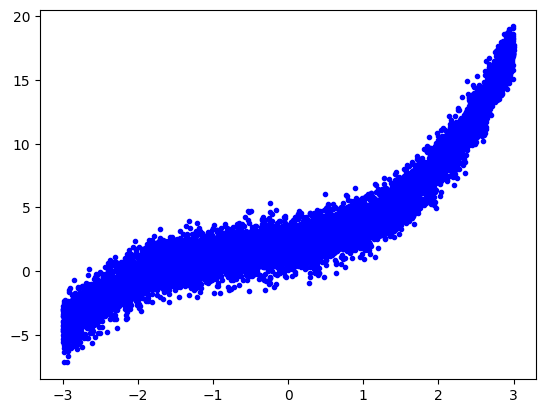

In [42]:
m = 10000
X = 6 * np.random.rand(m, 1) - 3
y = 0.3 * X**3 + 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape)

(8000, 1) (2000, 1) (8000, 1)


In [64]:
poly_scalar = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('std_scalar', StandardScaler())
])

In [65]:
X_train_poly_scaled = poly_scalar.fit_transform(X_train)
X_val_poly_scaled = poly_scalar.fit_transform(X_val)

In [100]:
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l1', eta0=0.001)

train_errors = [] # for plotting only
val_errors = []
models = []

minimum_val_error = float("inf")
best_model = None
best_epoch = None
for epoch in range(1000):
    # update step
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    # calculate validation error
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    y_val_error = mean_squared_error(y_val.ravel(), y_val_predict)
    # calculate train error
    y_train_error = mean_squared_error(y_train.ravel(), sgd_reg.predict(X_train_poly_scaled))
    # store results
    train_errors.append(y_train_error)
    val_errors.append(y_val_error)
    models.append(clone(sgd_reg))

    if y_val_error < minimum_val_error:
        minimum_val_error = y_val_error
        best_model = clone(sgd_reg)
        best_epoch = epoch

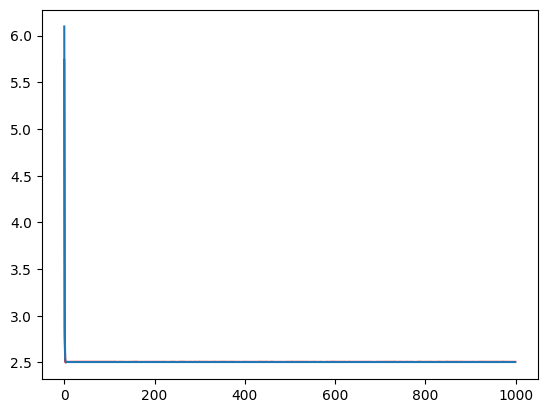

In [101]:
plt.plot(range(1000), val_errors, 'r-')
plt.plot(range(1000), train_errors)

In [102]:
best_epoch

3